In [1]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

from matplotlib import pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.gen_data_flow_ops import tensor_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow
import random

os.environ['TF_DETERMINISTIC_OPS'] = '1' #  c'est la ligne la plus importante
os.environ['PYTHONHASHSEED'] = '42'
os.environ['CUDA_VISIBLE_DEVICES'] = '' #  c'est facultatif
random.seed(42)
np.random.seed(42)
tensorflow.random.set_seed(42)

In [2]:
#---------------------------------------------
# CHARGEMENT DES OBSERVATIONS
#---------------------------------------------
sonar = pd.read_csv("sonar.all-data.csv", header = None)
sonar.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   R  
3  0.0040  0.0117   R  
4  0.0107  0.0094   R  

[5 rows x 61 columns]

In [3]:
#---------------------------------------------
# PREPARATION DES DONNEES
#---------------------------------------------

print("Nbr colonnes: ", len(sonar.columns))
#On ne prend que les données issues du sonar pour l'apprentissage
X = sonar[range(60)].values

#On ne prend que les libellé
y = sonar[60].values

#On encode : Les mines sont égales à 0 et les rochers égaux à 1

encoder = LabelEncoder()
y = encoder.fit_transform(y)

#On ajoute un encodage pour créer des classes :
# Si c'est une mine [1,0]
# Si c'est un rocher [0,1]

n_labels = len(y)
n_unique_labels = len(np.unique(y))
one_hot_encode = np.zeros((n_labels, n_unique_labels))
one_hot_encode[np.arange(n_labels), y] = 1
Y = one_hot_encode

#Verification en prenant les enregistrement 0 et 97
print("Classe Rocher:",int(Y[0][1]))
print("Classe Mine :",int(Y[97][1]))

Nbr colonnes:  61
Classe Rocher: 1
Classe Mine : 0


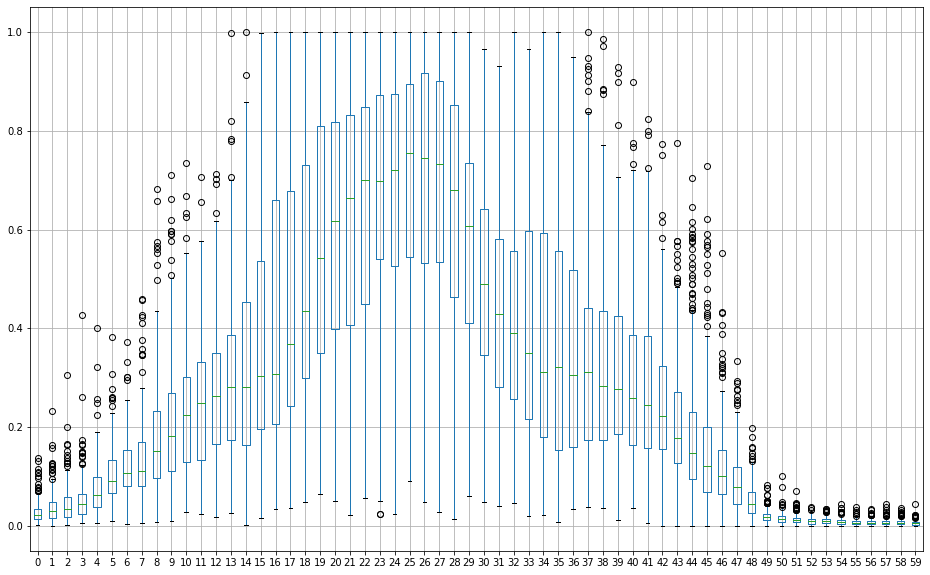

In [4]:
pd.DataFrame(X).boxplot(figsize=(16,10))

In [5]:
Y = sonar[60].replace({'M':0, 'R':1})
Y = Y.values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
#---------------------------------------------
# CREATION DES JEUX D'APPRENTISSAGE ET DE TEST
#---------------------------------------------

#On mélange
X, Y = shuffle(X, Y, random_state=1)

#Creation des jeux d'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [8]:
# Scaler StandardScaler()
scaler_standart = StandardScaler().fit(X_train)

X_train_sc = scaler_standart.transform(X_train)
X_test_sc = scaler_standart.transform(X_test)
X_val_sc = scaler_standart.transform(X_val)

pd.DataFrame(X_train_sc).boxplot(figsize=(16,10))

In [9]:
# Scaler MinMaxScaler
scaler_mnx = MinMaxScaler().fit(X_train)

X_train_mnx = scaler_mnx.transform(X_train)
X_test_mnx = scaler_mnx.transform(X_test)
X_val_mnx = scaler_mnx.transform(X_val)

pd.DataFrame(X_train_mnx).boxplot(figsize=(16,10))

In [10]:
# Scaler RobustScaler()
rscaler = RobustScaler().fit(X_train)

X_train_rsc = rscaler.transform(X_train)
X_test_rsc = rscaler.transform(X_test)
X_val_rsc = rscaler.transform(X_val)

pd.DataFrame(X_train_rsc).boxplot(figsize=(16,10))

In [11]:
def generate_nn(nb_features, activation_cachee='relu', nb_neuronnes=24,optimizer='adam'):
    entree = Input(shape=(nb_features,))
    cachee = Dense(nb_neuronnes, activation=activation_cachee)(entree)
    sortie = Dense(1,activation='sigmoid')(cachee)
    model = Model(inputs=entree,outputs=sortie)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [12]:
model = generate_nn(X.shape[1])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.get_weights()

[array([[ 0.08796215, -0.0315332 , -0.07863761, ...,  0.0244996 ,
         -0.20976505,  0.09445336],
        [ 0.08567128, -0.08715366,  0.05421001, ...,  0.08567709,
          0.04658431, -0.17926979],
        [ 0.12727103, -0.09592517,  0.05740234, ...,  0.08930454,
         -0.10286601, -0.0700642 ],
        ...,
        [-0.23996982,  0.1402986 , -0.23046762, ...,  0.1866833 ,
         -0.20804143, -0.03738563],
        [ 0.02774256, -0.18626235,  0.08071724, ..., -0.23479186,
          0.15452033,  0.01894844],
        [-0.0034993 ,  0.23619702,  0.15302229, ...,  0.19282806,
          0.17661968, -0.06357145]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.18409505],
        [-0.01520759],
        [ 0.42228654],
        [-0.24280614],
        [ 0.22648367],
        [ 0.38463673],
        [ 0.43772212],
        [ 0.24429652],
        [-0.14769807],
        [ 0.04622927],

In [14]:
# save du model1 (dans un fichier binaire)
model.save_weights('sauv0/ckpt')

In [15]:
# Evaluation du modèle avant même l'entrainement
loss0, acc0 = model.evaluate(X_test, y_test, batch_size=32)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
def plot_learning_curves(history):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (16, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (16, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

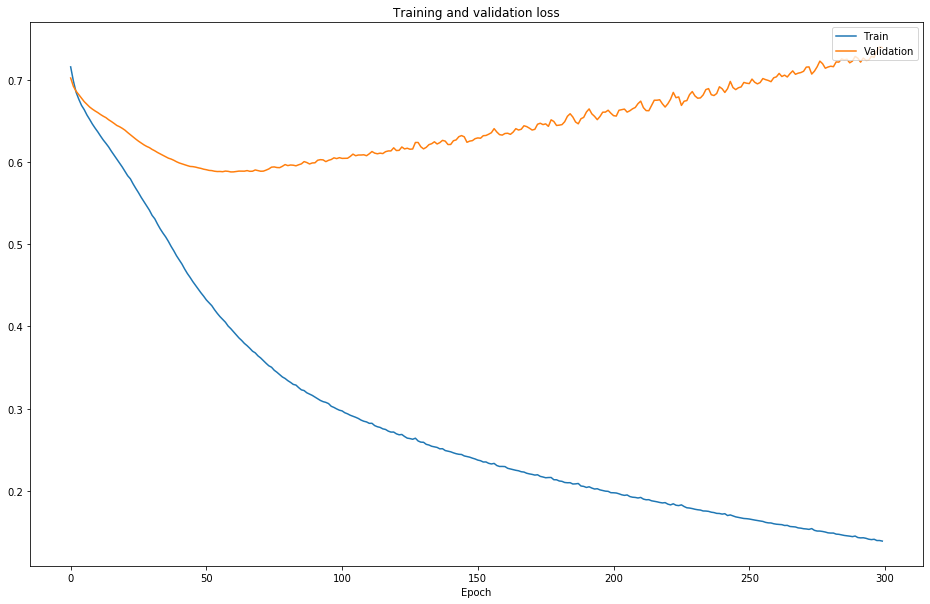

In [17]:
history = model.fit(X_train,y_train,epochs=300,batch_size=32,verbose=0,validation_data=(X_val,y_val))
plot_learning_curves(history)

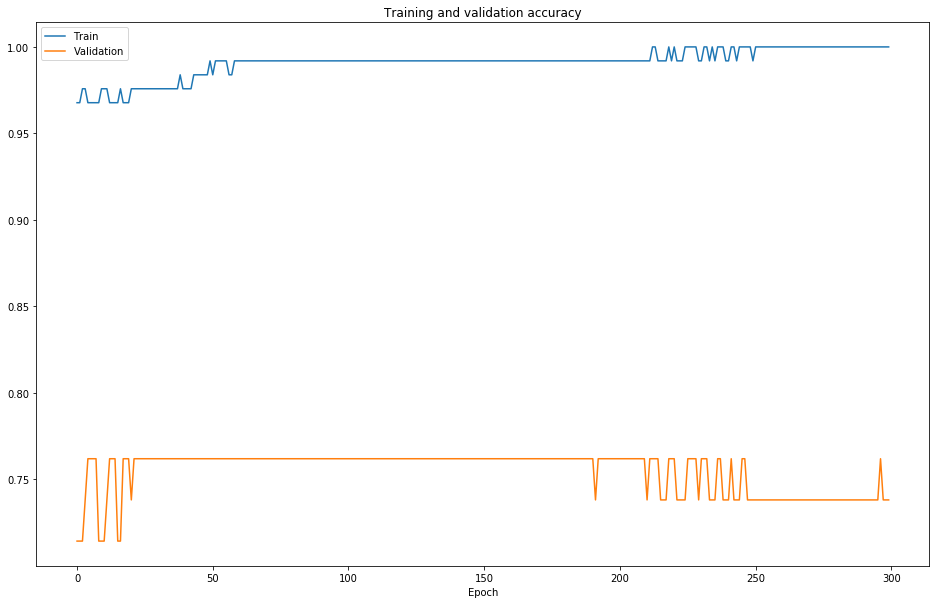

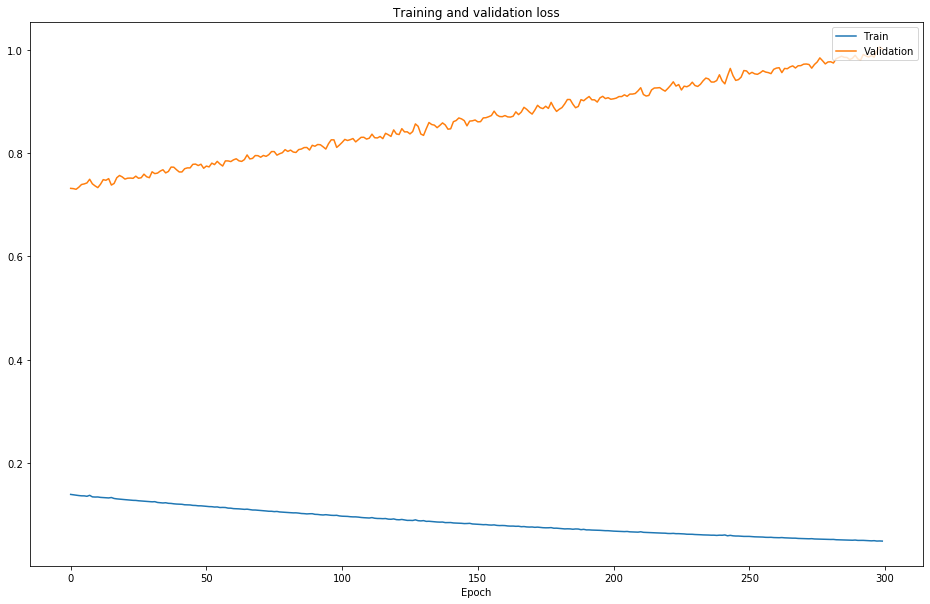

In [18]:
# en relançant un apprentissage, il va aller de l'itération 300 à 600
history2 = model.fit(X_train,y_train,epochs=300,batch_size=32,verbose=0,validation_data=(X_val,y_val))
plot_learning_curves(history2)

### 2e partie : modèle sans jeu de validation

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [20]:
model2 = generate_nn(X.shape[1])

In [21]:
# même poids dans model2 que model d'avant
model2.load_weights('sauv0/ckpt')

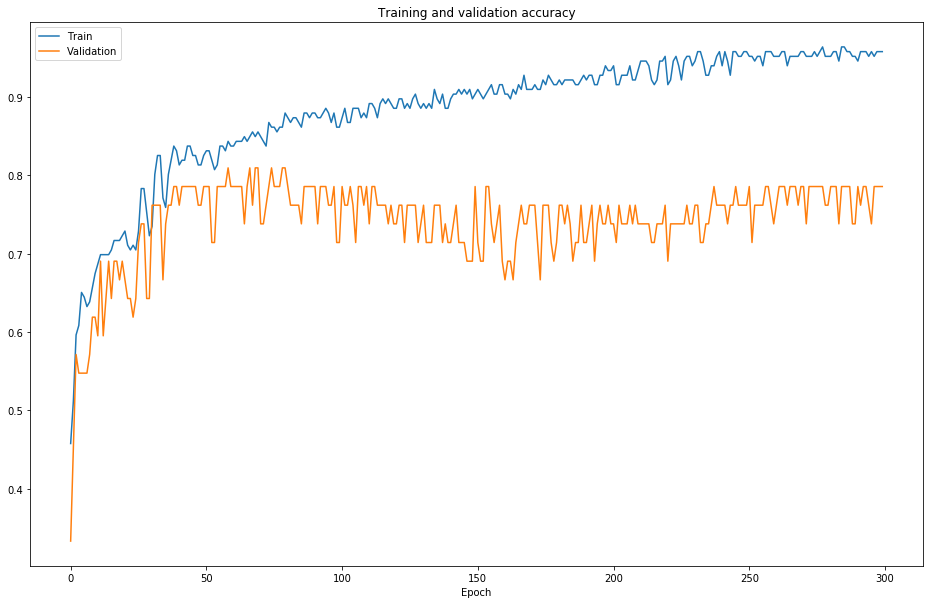

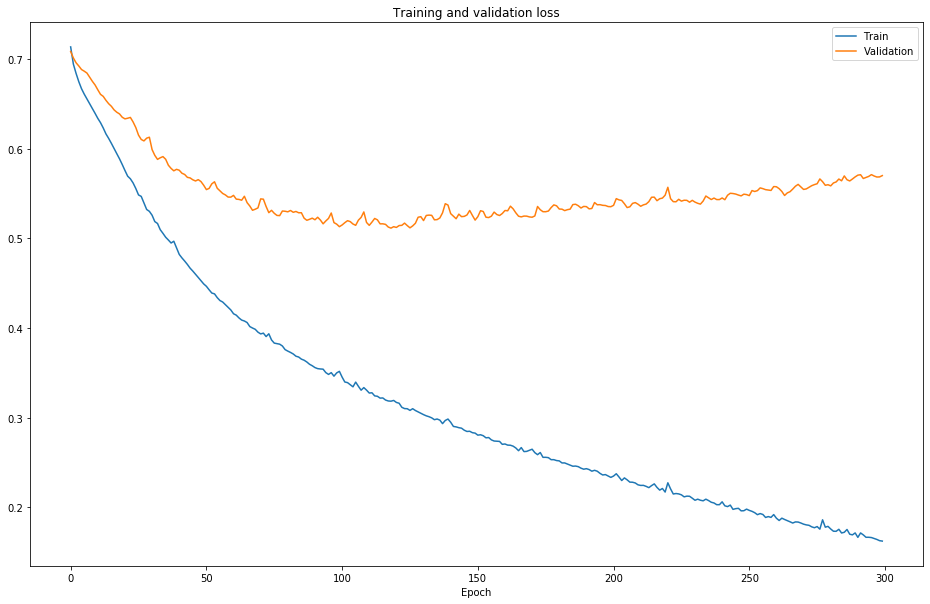

In [22]:
history_mod2 = model2.fit(X_train,y_train,epochs=300,batch_size=32,verbose=0,validation_data=(X_test,y_test))
plot_learning_curves(history_mod2)

In [23]:
model2.evaluate(X_test, y_test)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5701551905700138, 0.78571427]

In [24]:
# Scaler StandardScaler()
scaler_standart = StandardScaler().fit(X_train)

X_train_sc = scaler_standart.transform(X_train)
X_test_sc = scaler_standart.transform(X_test)

# Scaler MinMaxScaler
scaler_mnx = MinMaxScaler().fit(X_train)

X_train_mnx = scaler_mnx.transform(X_train)
X_test_mnx = scaler_mnx.transform(X_test)

# Scaler RobustScaler()
rscaler = RobustScaler().fit(X_train)

X_train_rsc = rscaler.transform(X_train)
X_test_rsc = rscaler.transform(X_test)

In [25]:
model_scale = generate_nn(X.shape[1])

In [26]:
model_scale.load_weights('sauv0/ckpt')

In [27]:
history_scale = model_scale.fit(X_train_sc,y_train,epochs=300,batch_size=32,verbose=0,validation_data=(X_test_sc,y_test))
plot_learning_curves(history_scale)

In [28]:
model_scale.evaluate(X_test_sc, y_test)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.808213035797789, 0.71428573]